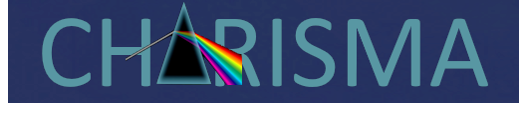

# CHARISMA Deliverable 4.2 Demonstration
#### *Bastian Barton, Fraunhofer LBF* - Sept. 15, 2021
Functionality of the Python software package *RamanChada* is demonstrated as hosted on GitHub:

https://gitlab.cc-asp.fraunhofer.de/barton/charisma-raman-spectrum-harmonization

***

### This Deliverable follows up to Work Package 4 Tasks 4.2 and 4.3

**Task T4.2: Data import, background and cosmic ray correction, and noise reduction**

- Data import routines will be built for all relevant native manufacturer formats.

- Optimised algorithms for background and cosmic ray correction as well as noise reduction will be developed and implemented in Python.

- Different numerical algorithms published in literature will be implemented and cross-validated using data from reference master samples specified by WP3. 

**Task 4.3. Spectrometer shift, gain, and modulation transfer function correction**

- Algorithms for correction of wavenumber-dependent spectrometer shift, gain, and MTF (peak broadening) will be developed, implemented in Python, and tested.

***

**Deliverable D4.2: Programs for correction of spectrometer recording artefacts (LBF, Month 10)**

*Python algorithms for:*

1. CHADA generation by native data import and conversion of spectra to the data structure defined in Task 4.1

1. correction of cosmic rays and noise reduction with minimal information loss

1. correction of shift, gain, and MTF based on measurements on standard samples.

1. Validation tests on >10 individual data sets generated in Task 3.4.

***

Import of required *Python* libraries

In [1]:
from ramanchada.classes import RamanChada, make_test_RamanChada

In [2]:
import os

In [3]:
import warnings
warnings.filterwarnings('ignore')

***

## 1. Demonstration of CHADA generation by native data import

### File format CSV - Various manufacturers

#### Copper sulphate powder.CSV - ELODIZ - DXR Thermo

Load native file format and plot *RamanChada* spectrum

In [4]:
path = r"ramanchada\src\ramanchada\testdata"
sample = "\Copper sulphate powder.CSV"

Importing 3527 data lines starting from line 1 in Copper sulphate powder.CSV.
Importing 0 metadata lines from Copper sulphate powder.CSV.



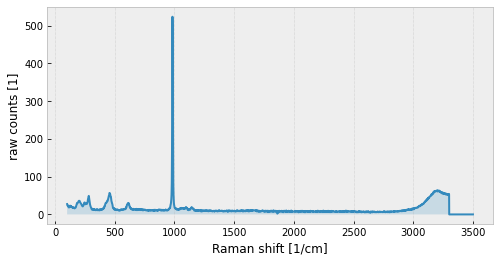

In [5]:
R = RamanChada(path+sample)
R.plot()

In [6]:
import numpy as np

In [7]:
np.__version__

'1.21.2'

Inspect *RamanChada* object

In [8]:
R

RamanChada with 3526 points generated Thu Oct 14 13:11:21 2021
Raman shift [1/cm]: 100.6722 - 3499.595
raw counts [1]: 0.0 - 523.9214

Inspect metadata contained in *RamanChada* object

In [9]:
R.meta

{'DIMENSION_LABELS': "['Raman shift [1/cm]' 'raw counts [1]']",
 '9.970802e+001': "['0.000000e+000']",
 'Original file': 'Copper sulphate powder.CSV',
 'CHADA generated on': 'Thu Oct 14 13:11:20 2021'}

Check that *.cha* file has been created in directory

In [10]:
path = os.path.dirname(path+sample)
[fn for fn in os.listdir(path) if fn.endswith('cha')]

['03 polystyrene.cha',
 '200218-17.cha',
 '27 polystyrene.cha',
 '72 polystyrene.cha',
 'Anatase__R070582__Raman__532__0__unoriented__Raman_Data_RAW__23054.cha',
 'anthracen(csma).cha',
 'AS020P frit.cha',
 'Copper sulphate powder.cha',
 'Lactose.cha',
 'Neon_S120_x20_7000msx15.cha',
 'Neon_Wasatch_Probe_2000msx15.cha',
 'Polystyrene.cha',
 'saffron.cha',
 'SILICON_x20_1%_02.cha',
 'Titanium dioxide powder.cha']

Define display function to reduce code lines

In [11]:
def show_import(filename):
    R = RamanChada(filename)
    R.plot()
    print(R)
    print('---METADATA---')
    print(list(R.meta.items())[:5])
    print('--- .CHA FILE---')
    path = os.path.dirname(filename)
    chafiles = [fn for fn in os.listdir(path) if fn.endswith('cha')]
    print(chafiles)

### File format JCAMP-DX - Various manufacturers

#### saffron.jdx

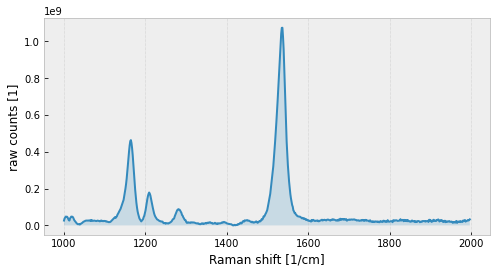

RamanChada with 668 points generated Thu Oct 14 13:11:22 2021
Raman shift [1/cm]: 1000.1 - 1996.0933333333332
raw counts [1]: 12079.0 - 1074063946.0
---METADATA---
[('DIMENSION_LABELS', "['Raman shift [1/cm]' 'raw counts [1]']"), ('TITLE', ' saffron'), ('JCAMP-DX', ' 4.24 $$Exported Grams Data File'), ('DATA TYPE', ' RAMAN SPECTRUM'), ('ORIGIN', ' University College, London')]
--- .CHA FILE---
['03 polystyrene.cha', '200218-17.cha', '27 polystyrene.cha', '72 polystyrene.cha', 'Anatase__R070582__Raman__532__0__unoriented__Raman_Data_RAW__23054.cha', 'anthracen(csma).cha', 'AS020P frit.cha', 'Copper sulphate powder.cha', 'Lactose.cha', 'Neon_S120_x20_7000msx15.cha', 'Neon_Wasatch_Probe_2000msx15.cha', 'Polystyrene.cha', 'saffron.cha', 'SILICON_x20_1%_02.cha', 'Titanium dioxide powder.cha']


In [12]:
sample = "\saffron.jdx"
show_import(path+sample)

### File format TXT - BWTek and various other manufacturers

#### AS020P frit.txt

Importing 2048 data lines starting from line 89 in AS020P frit.txt.
Found more than 2 data columns in AS020P frit.txt.
X data: assigning column labelled 'raman shift'.
Y data: assigning column labelled 'dark subtracted #1'.
Importing 88 metadata lines from AS020P frit.txt.



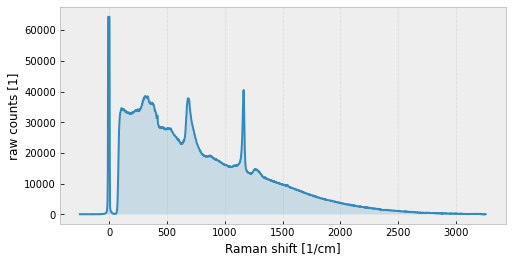

RamanChada with 2047 points generated Thu Oct 14 13:11:23 2021
Raman shift [1/cm]: -254.65 - 3256.46
raw counts [1]: -45.9 - 64359.1
---METADATA---
[('DIMENSION_LABELS', "['Raman shift [1/cm]' 'raw counts [1]']"), ('File Version', "['BWSpec4.11_1']"), ('Date', "['2021-02-10 12:46:06']"), ('title', "['BWS415-785S']"), ('model', "['BTC162E-785S-SYS']")]
--- .CHA FILE---
['03 polystyrene.cha', '200218-17.cha', '27 polystyrene.cha', '72 polystyrene.cha', 'Anatase__R070582__Raman__532__0__unoriented__Raman_Data_RAW__23054.cha', 'anthracen(csma).cha', 'AS020P frit.cha', 'Copper sulphate powder.cha', 'Lactose.cha', 'Neon_S120_x20_7000msx15.cha', 'Neon_Wasatch_Probe_2000msx15.cha', 'Polystyrene.cha', 'saffron.cha', 'SILICON_x20_1%_02.cha', 'Titanium dioxide powder.cha']


In [13]:
sample = "\AS020P frit.txt"
show_import(path+sample)

### File format SPC - GRAMS / Thermo Fisher, Galactic, Various manufacturers

#### Polystyrene.spc

gx-y(1)


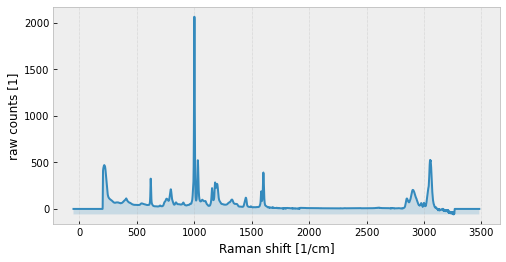

RamanChada with 3533 points generated Thu Oct 14 13:11:24 2021
Raman shift [1/cm]: -51.0 - 3481.0
raw counts [1]: -59.0 - 2063.4072265625
---METADATA---
[('DIMENSION_LABELS', "['Raman shift [1/cm]' 'raw counts [1]']"), ('length', '14676'), ('ftflg', ''), ('fversn', 'K'), ('fexper', '0')]
--- .CHA FILE---
['03 polystyrene.cha', '200218-17.cha', '27 polystyrene.cha', '72 polystyrene.cha', 'Anatase__R070582__Raman__532__0__unoriented__Raman_Data_RAW__23054.cha', 'anthracen(csma).cha', 'AS020P frit.cha', 'Copper sulphate powder.cha', 'Lactose.cha', 'Neon_S120_x20_7000msx15.cha', 'Neon_Wasatch_Probe_2000msx15.cha', 'Polystyrene.cha', 'saffron.cha', 'SILICON_x20_1%_02.cha', 'Titanium dioxide powder.cha']


In [14]:
sample = "\Polystyrene.spc"
show_import(path+sample)

### File format SPA - Nicolet / Thermo (Omnic)

#### Titanium dioxide powder.SPA

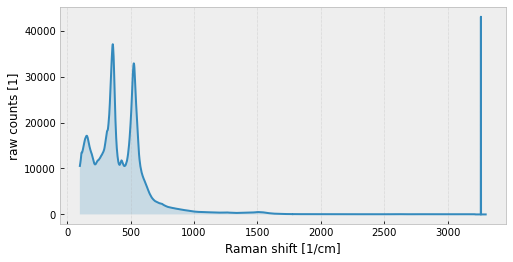

RamanChada with 3319 points generated Thu Oct 14 13:11:25 2021
Raman shift [1/cm]: 100.67224884033203 - 3299.9990234375
raw counts [1]: 0.0 - 43040.19140625
---METADATA---
[('DIMENSION_LABELS', "['Raman shift [1/cm]' 'raw counts [1]']"), ('Original file', 'Titanium dioxide powder.SPA'), ('CHADA generated on', 'Thu Oct 14 13:11:25 2021')]
--- .CHA FILE---
['03 polystyrene.cha', '200218-17.cha', '27 polystyrene.cha', '72 polystyrene.cha', 'Anatase__R070582__Raman__532__0__unoriented__Raman_Data_RAW__23054.cha', 'anthracen(csma).cha', 'AS020P frit.cha', 'Copper sulphate powder.cha', 'Lactose.cha', 'Neon_S120_x20_7000msx15.cha', 'Neon_Wasatch_Probe_2000msx15.cha', 'Polystyrene.cha', 'saffron.cha', 'SILICON_x20_1%_02.cha', 'Titanium dioxide powder.cha']


In [15]:
sample = "\Titanium dioxide powder.SPA"
show_import(path+sample)

### File format WDF - Renishaw Wire > 2.X

#### 200218-17.wdf

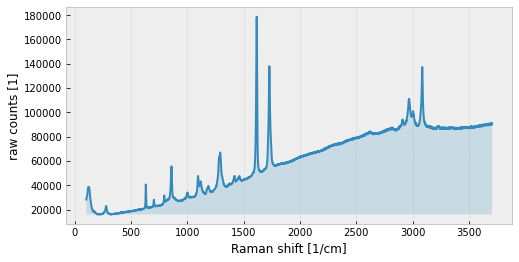

RamanChada with 3190 points generated Thu Oct 14 13:11:26 2021
Raman shift [1/cm]: 102.76953125 - 3703.7109375
raw counts [1]: 16036.375 - 178712.09375
---METADATA---
[('DIMENSION_LABELS', "['Raman shift [1/cm]' 'raw counts [1]']"), ('laser wavelength', '514.5011961147924'), ('no. of accumulations', '3'), ('spectral unit', 'Counts'), ('OEM software name', 'WiRE')]
--- .CHA FILE---
['03 polystyrene.cha', '200218-17.cha', '27 polystyrene.cha', '72 polystyrene.cha', 'Anatase__R070582__Raman__532__0__unoriented__Raman_Data_RAW__23054.cha', 'anthracen(csma).cha', 'AS020P frit.cha', 'Copper sulphate powder.cha', 'Lactose.cha', 'Neon_S120_x20_7000msx15.cha', 'Neon_Wasatch_Probe_2000msx15.cha', 'Polystyrene.cha', 'saffron.cha', 'SILICON_x20_1%_02.cha', 'Titanium dioxide powder.cha']


In [16]:
sample = r"\200218-17.wdf"
show_import(path+sample)

### File format PRN - HORIBA

#### anthracen(csma).prn

Importing 577 data lines starting from line 1 in anthracen(csma).prn.
Importing 0 metadata lines from anthracen(csma).prn.



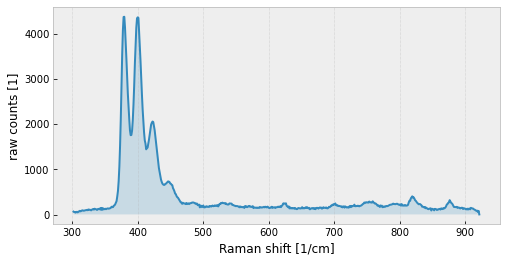

RamanChada with 576 points generated Thu Oct 14 13:11:27 2021
Raman shift [1/cm]: 301.88028 - 921.60983
raw counts [1]: 6.0 - 4373.0
---METADATA---
[('DIMENSION_LABELS', "['Raman shift [1/cm]' 'raw counts [1]']"), ('922.68762     0.00000', '[]'), ('Original file', 'anthracen(csma).prn'), ('CHADA generated on', 'Thu Oct 14 13:11:27 2021')]
--- .CHA FILE---
['03 polystyrene.cha', '200218-17.cha', '27 polystyrene.cha', '72 polystyrene.cha', 'Anatase__R070582__Raman__532__0__unoriented__Raman_Data_RAW__23054.cha', 'anthracen(csma).cha', 'AS020P frit.cha', 'Copper sulphate powder.cha', 'Lactose.cha', 'Neon_S120_x20_7000msx15.cha', 'Neon_Wasatch_Probe_2000msx15.cha', 'Polystyrene.cha', 'saffron.cha', 'SILICON_x20_1%_02.cha', 'Titanium dioxide powder.cha']


In [17]:
sample = r"\anthracen(csma).prn"
show_import(path+sample)

### File format  0, 1, ... - Bruker OPUS

#### Lactose.0 (this is IR data)

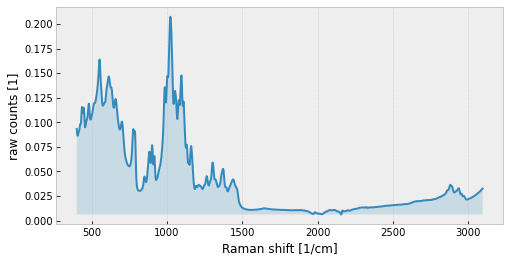

RamanChada with 1400 points generated Thu Oct 14 13:11:29 2021
Raman shift [1/cm]: 399.2121992680664 - 3097.2695266884766
raw counts [1]: 0.006288801785558462 - 0.20733404159545898
---METADATA---
[('DIMENSION_LABELS', "['Raman shift [1/cm]' 'raw counts [1]']"), ('DPF', '1'), ('NPT', '1400'), ('FXV', '3097.2695266884766'), ('LXV', '399.2121992680664')]
--- .CHA FILE---
['03 polystyrene.cha', '200218-17.cha', '27 polystyrene.cha', '72 polystyrene.cha', 'Anatase__R070582__Raman__532__0__unoriented__Raman_Data_RAW__23054.cha', 'anthracen(csma).cha', 'AS020P frit.cha', 'Copper sulphate powder.cha', 'Lactose.cha', 'Neon_S120_x20_7000msx15.cha', 'Neon_Wasatch_Probe_2000msx15.cha', 'Polystyrene.cha', 'saffron.cha', 'SILICON_x20_1%_02.cha', 'Titanium dioxide powder.cha']


In [18]:
sample = r"\Lactose.0"
show_import(path+sample)

***

## 2. Demonstration of correction of cosmic rays and noise reduction

### Correction of fluorescent background

Load test spectrum

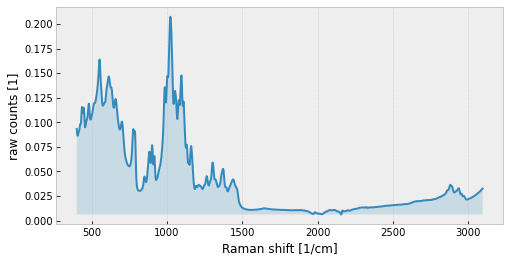

RamanChada with 1400 points generated Thu Oct 14 13:11:30 2021
Raman shift [1/cm]: 399.2121992680664 - 3097.2695266884766
raw counts [1]: 0.006288801785558462 - 0.20733404159545898
---METADATA---
[('DIMENSION_LABELS', "['Raman shift [1/cm]' 'raw counts [1]']"), ('DPF', '1'), ('NPT', '1400'), ('FXV', '3097.2695266884766'), ('LXV', '399.2121992680664')]
--- .CHA FILE---
['03 polystyrene.cha', '200218-17.cha', '27 polystyrene.cha', '72 polystyrene.cha', 'Anatase__R070582__Raman__532__0__unoriented__Raman_Data_RAW__23054.cha', 'anthracen(csma).cha', 'AS020P frit.cha', 'Copper sulphate powder.cha', 'Lactose.cha', 'Neon_S120_x20_7000msx15.cha', 'Neon_Wasatch_Probe_2000msx15.cha', 'Polystyrene.cha', 'saffron.cha', 'SILICON_x20_1%_02.cha', 'Titanium dioxide powder.cha']


In [19]:
sample = r"\Lactose.0"
show_import(path+sample)

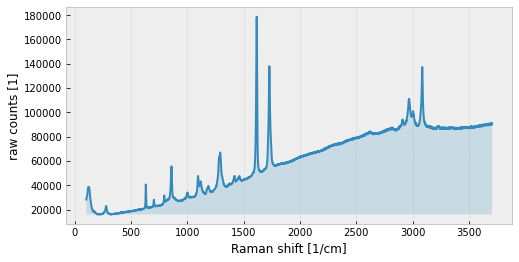

In [20]:
B = make_test_RamanChada()
B.plot()

Fit baseline model using the SNIP algorithm and remove from data

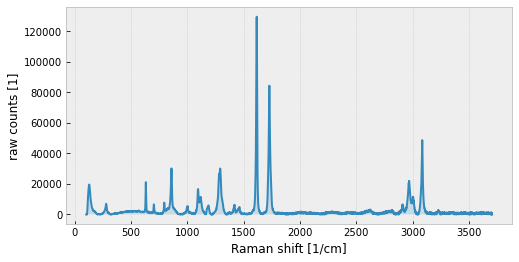

In [21]:
B.fit_baseline(method='snip')
B.remove_baseline()
B.plot()

Reset data. Fit baseline model using the ALS algorithm and remove from data

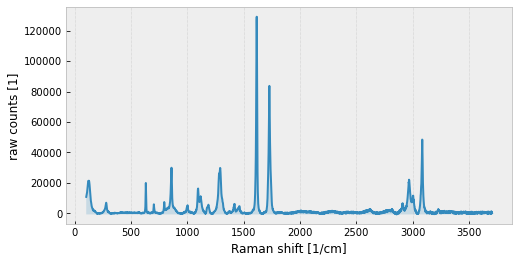

In [22]:
B.rewind(0)
B.fit_baseline(method='als')
B.remove_baseline()
B.plot()

***

### Correction of cosmic rays

Load test spectrum

x-y(1)


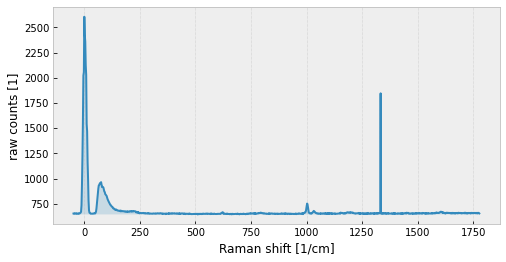

In [23]:
sample = r"\72 polystyrene.spc"
X = RamanChada(path+sample)
X.plot()

Fit x ray model and plot

In [24]:
X.fit_xrays()

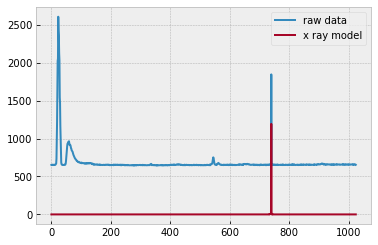

In [25]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(X.y, label='raw data')
plt.plot(X.xrays, label='x ray model')
plt.legend()
plt.show()

Subtract x ray model and plot corrected spectrum

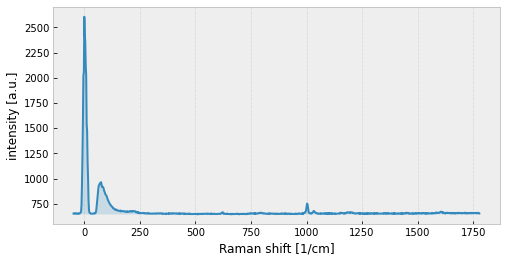

In [26]:
X.remove_xrays()
X.plot()

***

### Noise reduction with minimal information loss

Load test spectrum

In [27]:
sample = r"\27 polystyrene.spc"
N = RamanChada(path+sample)

x-y(1)


Make *SpectrumGroup* to compare spectra

In [28]:
from ramanchada.classes import SpectrumGroup

In [29]:
G = SpectrumGroup([N])

Apply Savitzky-Golay smoothing filter

In [30]:
N.smooth(method='sg')

Compare result to raw data

In [31]:
G.add(N)

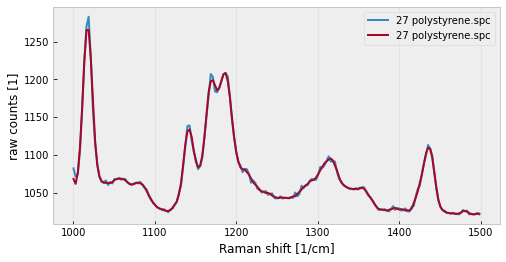

In [32]:
G.process('x_crop', 1000, 1500)
G.plot()

***

## 3. Demonstration of correction of shift, gain, and MTF

### Correction of wavenumber shift - *x calibration*

Load test data (Neon spectra)

In [33]:
neon_ref_file = r"\Neon_S120_x20_7000msx15.cha"
NEON_REF = RamanChada(path+neon_ref_file)

In [34]:

neon_target_file = r"\Neon_Wasatch_Probe_2000msx15.csv"
NEON_TAR = RamanChada(path+neon_target_file)

Importing 1024 data lines starting from line 35 in Neon_Wasatch_Probe_2000msx15.csv.
Found more than 2 data columns in Neon_Wasatch_Probe_2000msx15.csv.
X data: assigning column # 2.
Y data: assigning column # 3.
Importing 34 metadata lines from Neon_Wasatch_Probe_2000msx15.csv.



Make *SpectrumGroup* to compare spectra

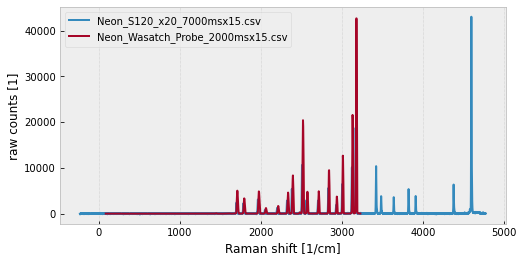

In [35]:
N = SpectrumGroup([NEON_REF, NEON_TAR])
N.plot()

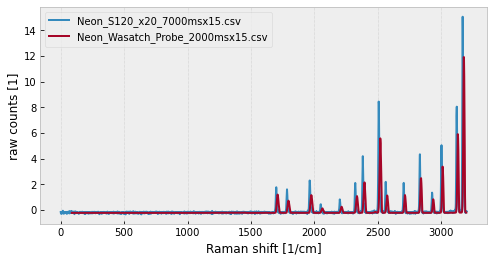

In [36]:
N.process('x_crop', 0, 3200)
N.process('normalize')
N.plot()

Fit calibration by peak position comparison, using a Voigt distribution as peak model

In [37]:
neon_cal = NEON_TAR.make_x_calibration(NEON_REF)

In [38]:
neon_cal

RamanCalibration with 13 points generated Thu Oct 14 13:11:36 2021
Raman shift: 1709.4783983983984 - 3178.4252652652654
RS correction: -13.840480480480892 - -9.278758758758613

Plot x calibration data (circles) and model (5th order polynomial, red).

- *RS correction*: Wavenumber-dependent x shift applied by the calibration.

Note that shifts outside the interval of mesured peaks are set to the boundary shifts rather than being interpolated.

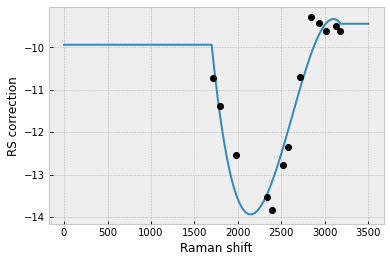

In [39]:
neon_cal.show()

The x calibration object has a timestamp.

In [40]:
neon_cal.time

'Thu Oct 14 13:11:36 2021'

Calibrate the target spectrum using the generated calibration

In [41]:
NEON_TAR.calibrate(neon_cal)

Group calibrated spectrum with original data to see result.

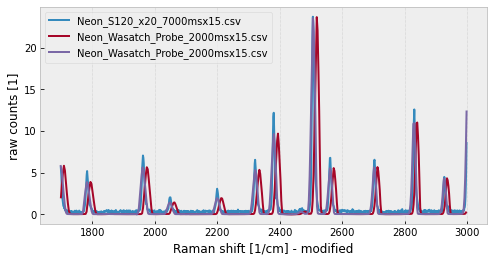

In [42]:
N.add(NEON_TAR)
N.process('x_crop', 1700, 3000)
N.process('normalize', 'area')
N.plot()

- red - Reference spectrum

- blue - original Target spectrum

- purple - Target calibrated to Reference

***

### Correction of gain - *y calibration*

Generate y calibration using x-calibrated Target in the x Range 1,700 - 3,200 1/cm.

In [43]:
neon_cal_y = NEON_TAR.make_y_calibration(NEON_REF, 1700, 3200)

In [44]:
print(neon_cal_y)
print(neon_cal_y.y.mean())
print(neon_cal_y.y.std())

RamanCalibration with 1231 points generated Thu Oct 14 13:11:36 2021
Raman shift: 1699.37 - 3198.13
y gain: -33.20499372622524 - 37.9846171502595
1.1505826460628168
3.767460961887633


Calibrate the target spectrum using the generated calibration

In [45]:
NEON_TAR.calibrate_y(neon_cal_y)

Group calibrated spectrum with original data to see result.

In [46]:
N2 = SpectrumGroup([NEON_REF, NEON_TAR])

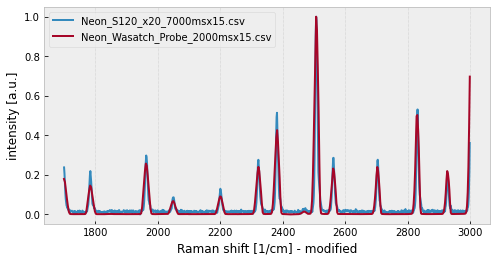

In [47]:
N2.process('x_crop', 1700, 3000)
N2.process('normalize', 'minmax')
N2.plot()

- red - Reference spectrum

- blue - Target calibrated to Reference (x **and** y)

***

### Correction of MTF

*MTF*: modulation transfer function of digital detector

The MTF is the detector response to a single photon. This can be approximated by modelling a cosmic ray peak.

Load test spectrum that has x ray artifacts.

In [48]:
file = r'/03 polystyrene.cha'
X = RamanChada(path+file)

In [49]:
GX = SpectrumGroup([X])

X ray artifacts are automatically extracted from spectra in group GX, and used to generate an MTF model in Fourier space. This model is stored in a *RamanMTF* object (*cal_mtf*).

In [50]:
cal_mtf = GX.make_mtf_calibration()

3 xrays found in Group
calculated MTF with amlitude = 0.5722729234245871 at full Nyquist.


Inspect MTF calibration and plot in Fourier space

In [51]:
cal_mtf

RamanMTF with 1024 points generated Thu Oct 14 13:11:37 2021
Nyquist frequency: 0.0 - 1.0
amplitude: 0.19302045875488036 - 1.0

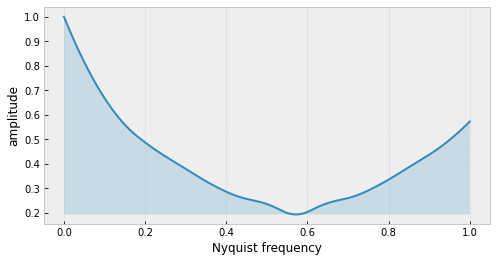

In [52]:
cal_mtf.plot()

In [53]:
X.fit_xrays()
X.remove_xrays()
GX.add(X)

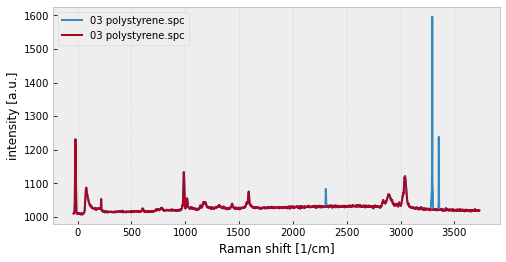

In [54]:
GX.plot()

- red - Original spectrum

- blue - x ray-corrected spectrum

Apply MTF calibration to spectrum

In [55]:
X.deconvolve_MTF(cal_mtf)

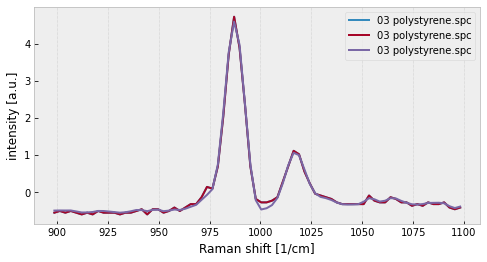

In [56]:
GX.add(X)
GX.process('x_crop', 900, 1100)
GX.process('normalize')
GX.plot()

- red/blue - original/x ray-corr. spectrum

- purple - MTF-corr. spectrum

Spectra recorded on the same detector can now be MTF-corrected using the calibration object / file.

In [57]:
file = r'/27 polystyrene.cha'
X2 = RamanChada(path+file)

In [58]:
GX2 = SpectrumGroup([X])

In [59]:
X2.deconvolve_MTF(cal_mtf)

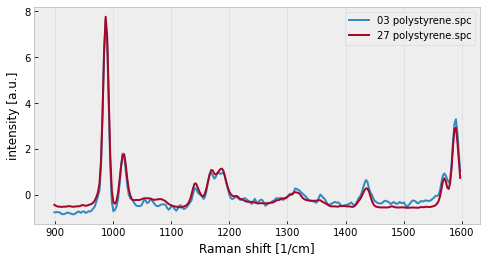

In [60]:
GX2.add(X2)
GX2.process('x_crop', 900, 1600)
GX2.process('normalize')
GX2.plot()

- red - original spectrum

- blue - MTF-corr. spectrum

***

***

## 4. Validation tests on >10 individual data sets

**The following steps will be demonstrated for each test dataset:**

1. CHADA generation by native data import

1. correction of cosmic rays and noise reduction

1. correction of shift, gain, and MTF

Choose 10 independent datasets from various instruments and laboratories within the *CHARISMA* consortium

In [61]:
files = [
    r"\saffron.jdx",
    r"\Copper sulphate powder.CSV",
    r"\AS020P frit.txt",
    r"\Polystyrene.spc",
    r"\200218-17.wdf",
    r"\anthracen(csma).prn",
    r"\SILICON_x20_1%_02.spc",
    r'\72 polystyrene.cha',
    r"\Neon_S120_x20_7000msx15.cha",
    r"\Anatase__R070582__Raman__532__0__unoriented__Raman_Data_RAW__23054.cha"
    ]

In [62]:
len(files)

10

For each of the 10 datasets, the numerical methods are applied as described above. The original data is plotted with the processed data for comparison.

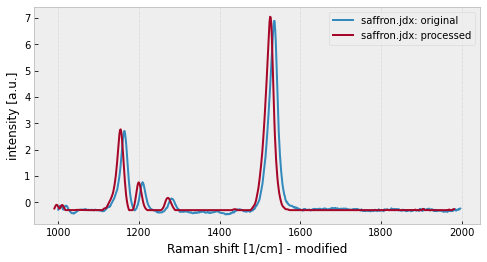

Importing 3527 data lines starting from line 1 in Copper sulphate powder.CSV.
Importing 0 metadata lines from Copper sulphate powder.CSV.



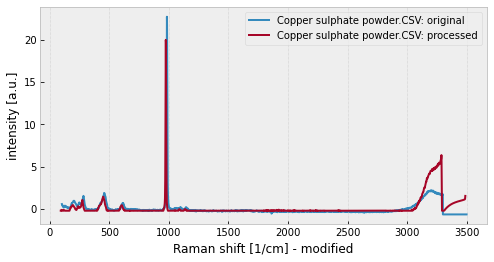

Importing 2048 data lines starting from line 89 in AS020P frit.txt.
Found more than 2 data columns in AS020P frit.txt.
X data: assigning column labelled 'raman shift'.
Y data: assigning column labelled 'dark subtracted #1'.
Importing 88 metadata lines from AS020P frit.txt.



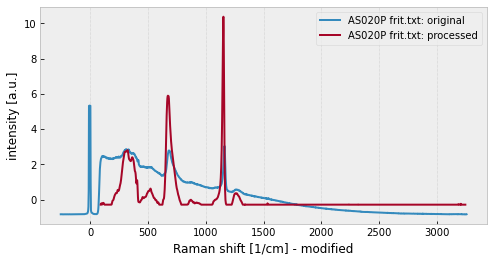

gx-y(1)


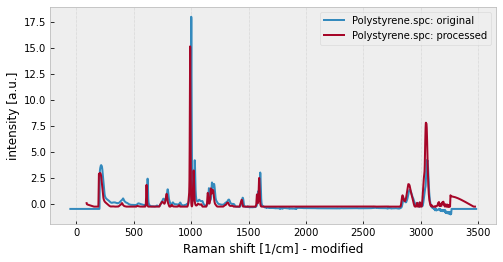

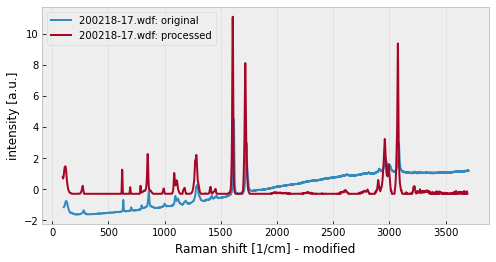

Importing 577 data lines starting from line 1 in anthracen(csma).prn.
Importing 0 metadata lines from anthracen(csma).prn.

Calibration not in data range!


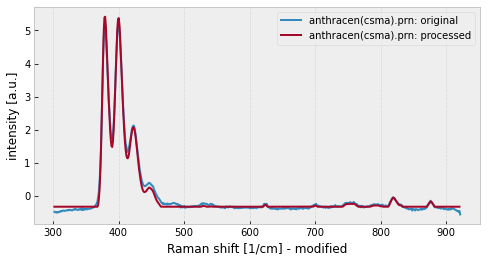

gx-y(1)


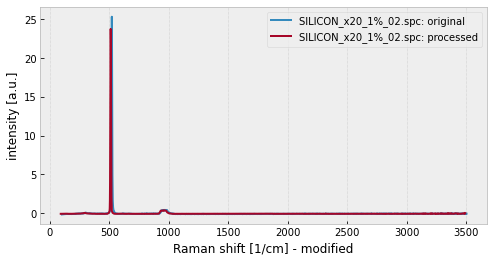

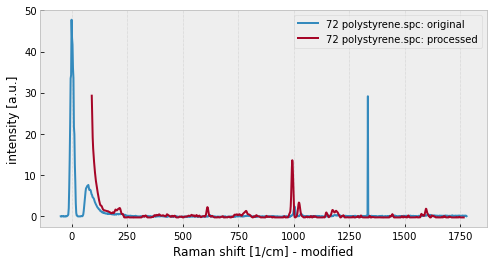

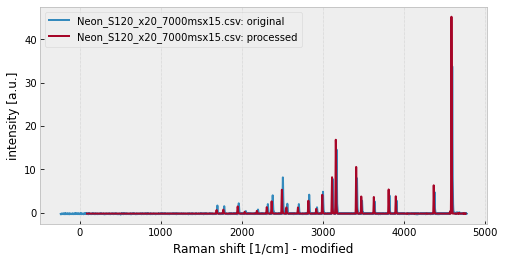

Calibration not in data range!


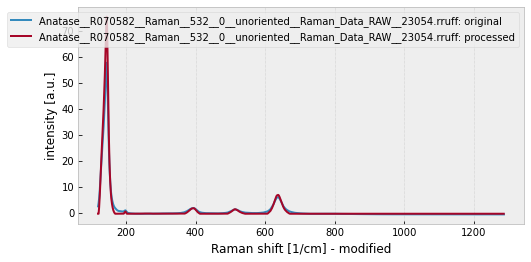

In [63]:
for file in files:
    
    # Native data import and RamanChada generation
    R = RamanChada(path+file)
    
    # y data normalization
    R.normalize(x_min=250, x_max=3200)
    
    VAL = SpectrumGroup([R])
    VAL.data_labels[-1] = VAL.data_labels[-1] + ': original'
    
    # crop x to are of interest
    R.x_crop(100, 5000)
    
    # Baseline correction
    R.fit_baseline()
    R.remove_baseline()
    
    # x ray correction
    R.fit_xrays()
    R.remove_xrays()
    
    # Denoising
    R.smooth()
    
    # x calibration
    R.calibrate(neon_cal)
    
    # y (gain) calibration
    R.calibrate_y(neon_cal_y)
    
    # MTF correction
    R.deconvolve_MTF(cal_mtf)
    
    # y data normalization of processed spectrum
    R.normalize(x_min=250, x_max=3200)
    
    VAL.add(R)
    VAL.data_labels[-1] = VAL.data_labels[-1] + ': processed'
    VAL.plot()